<a href="https://colab.research.google.com/github/palienko105/Projects/blob/main/ABC_analysis_PostgreSQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Подключение к БД:

In [1]:
!pip install psycopg2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import psycopg2

In [4]:
con = psycopg2.connect(host="89.208.197.76", port = 5432, database="apteka", user="student", password="qweasd963")

In [5]:
cur = con.cursor()

In [6]:
def select (sql):
  return pd.read_sql(sql, con)

In [7]:
sql = '''
select * from information_schema.tables
'''
select (sql)

,table_catalog,table_schema,table_name,table_type,self_referencing_column_name,reference_generation,user_defined_type_catalog,user_defined_type_schema,user_defined_type_name,is_insertable_into,is_typed,commit_action
0,apteka,public,cities,BASE TABLE,None,None,None,None,None,YES,NO,None
1,apteka,public,bonuscheques,BASE TABLE,None,None,None,None,None,YES,NO,None
2,apteka,public,discounts,BASE TABLE,None,None,None,None,None,YES,NO,None
3,apteka,public,employee,BASE TABLE,None,None,None,None,None,YES,NO,None
4,apteka,public,sales,BASE TABLE,None,None,None,None,None,YES,NO,None
...,...,...,...,...,...,...,...,...,...,...,...,...
191,apteka,information_schema,foreign_data_wrappers,VIEW,None,None,None,None,None,NO,NO,None
192,apteka,information_schema,foreign_server_options,VIEW,None,None,None,None,None,NO,NO,None
193,apteka,information_schema,foreign_servers,VIEW,None,None,None,None,None,NO,NO,None
194,apteka,information_schema,user_mappings,VIEW,None,None,None,None,None,NO,NO,None


# Задание:

Необходимо провести многомерный ABC анализ:



*   по количеству проданных позиций
*   по прибыли с позиции
*   по выручке


---



Примечание: ABC-анализ должен быть представлен одним SQL-запросом.

Для расчетов вам понадобится таблица *sales*, а именно столбцы:

*dr_kol* - кол-во проданного товара в данной строке чека   
*dr_ndrugs* - название товара   
*dr_dat* - дата чека   
*dr_croz* - розничная цена   
*dr_czak* - закупочная цена   
*dr_sdisc* - сумма скидки на всю строку чека (даже если dr_kol > 1, вычитать сумму скидки нужно со строки чека, а не с каждой проданной позиции)   



---


Обратите внимание на способ расчета каждой из метрик:

выручка = кол-во проданных позиций * розничную цену - скидка    
прибыль = кол-во проданных позиций * (розница - закупка) - скидка

In [8]:
sql = '''
select * from sales
'''
select (sql)

,dr_dat,dr_tim,dr_nchk,dr_ndoc,dr_apt,dr_kkm,dr_tdoc,dr_tpay,dr_cdrugs,dr_ndrugs,...,dr_prod,dr_kol,dr_czak,dr_croz,dr_sdisc,dr_cdisc,dr_bcdisc,dr_tabempl,dr_pos,dr_vzak
0,2022-05-01,08:33:09,6251,7001554,7,22553,Розничная реализация,18,20398,"ОТРИВИН 0,1% 10МЛ. №1 НАЗАЛ.СПРЕЙ ФЛ. /ГЛАКСО/...",...,Новартис Консьюмер Хелс С.А.,1.0,146.00,175.00,8.0,9,200010024843,37,1,1
1,2022-05-01,09:03:32,4659,6002284,6,22568,Розничная реализация,18,541023,РАСТОРОПШИ ШРОТ 100Г. ПОР. /ИВАН ДА МАРЬЯ/,...,ИВАН ДА МАРЬЯ ООО,2.0,38.62,67.00,16.0,35,200000000022,27,1,1
2,2022-05-01,09:07:49,6077,2002811,2,22569,Розничная реализация,18,25634,АККУ-ЧЕК ТЕСТ-ПОЛОСКИ АКТИВ №50 [ACCU-CHEK],...,РОШ ДИАБЕТС КЕА ГМБХ,1.0,1107.57,1363.00,0.0,NULL,NULL,25,1,1
3,2022-05-01,09:07:49,6077,2002811,2,22569,Розничная реализация,18,1504331,"Карта LOYALITY 0,01Р",...,РОШ ДИАБЕТС КЕА ГМБХ,1.0,0.01,0.01,0.0,NULL,NULL,25,2,1
4,2022-05-01,09:08:38,6253,7001554,7,22553,Розничная реализация,18,25975,ЛИНКАС ЛОР ЛИМОН+МЕД №16 ПАСТИЛКИ,...,HERBION ПАКИСТАН,1.0,122.42,173.00,12.0,9,200010023454,37,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45123,2022-06-09,21:33:02,4067,18001790,18,9907,Розничная реализация,18,341505,ВАЛЕРИАНА ЭКСТРАКТ 20МГ. №50 ТАБ. П/О /БОРИСОВ...,...,БОРИСОВСКИЙ ЗАВОД МЕДПРЕПАРАТОВ,1.0,46.05,72.00,0.0,NULL,NULL,48,1,1
45124,2022-06-09,21:36:21,4069,18001790,18,9907,Розничная реализация,18,298762,ФУРАЦИЛИН АВЕКСИМА 20МГ. №10 ШИП.ТАБ. Д/Р-РА Д...,...,ИРБИТСКИЙ ХИМФАРМЗАВОД,1.0,96.91,141.00,0.0,NULL,NULL,48,1,1
45125,2022-06-09,21:40:08,4071,18001790,18,9907,Розничная реализация,18,419413,Д-ПАНТЕНОЛ-НИЖФАРМ 5% 30Г. МАЗЬ Д/НАРУЖ.ПРИМ. ...,...,Хемофарм А.Д. (HEMOFARM ),1.0,245.27,327.00,0.0,NULL,NULL,48,1,1
45126,2022-06-09,21:50:32,4073,18001790,18,9907,Розничная реализация,18,42974,ЛЮКСПЛАСТ ЛЕЙКОПЛАСТ. БАКТЕР. 19Х72ММ ТКАН. ЭЛ...,...,АЛЬПИНА ПЛАСТ ООО,1.0,47.67,77.00,0.0,NULL,NULL,48,1,1


# Решение:

Суть ABC анализа заключается в том, чтобы классифицировать позиции с точки зрения их вклада в общий "котел" выручки / количества / прибыли.

Обычно происходит разделение на 3 группы:

*   **Группа A** - наиболее ценные позиции, они обеспечивают 80% продаж.
*   **Группа B** - промежуточные позиции, они обеспечивают 15% продаж.
*   **Группа С** - наименее ценные позиции, они обеспечивают 5% продаж.

Алгоритм проведения ABC-анализа на примере продаж:

1. Считаем количество продаж каждого товара.
2. Сортируем таблицу по убыванию количества продаж.
3. Считаем накопительную сумму для каждого продукта.
4. Делим накопительную сумму для каждого товара на общую сумму всех продаж.
5. Основываясь на результате вычислений выше относим товар к той или иной группе.



In [16]:
sql = '''
-- PostgreSQL

with svod as -- Считаем Количество товара, Выручку и прибыль по каждому товару
(
  select dr_ndrugs as product, sum(dr_kol) as amount, 
  sum(dr_kol*(dr_croz - dr_czak) - dr_sdisc) as profit,
  sum(dr_kol*dr_croz - dr_sdisc) as revenue
  from sales
  group by dr_ndrugs
)

--В таблице ниже проводим многомерный ABC анализ.

/*
По количеству проданных позиций:
Считаем накопительную сумуу sum(amount) over (order by amount desc) для каждого продукта. 
Далее делим это значение на общую сумму по всей таблице sum(amount) over (). 
Затем сравниваем получившееся значение с 0.8, 0.95 и присваиваем соответствующую категорию данному товару.

По прибыли с позиции и по выручке проводим анализ аналогично.
*/


select product,

  case 
  when sum(amount) over (order by amount desc) / sum(amount) over () <= 0.8 then 'A'
  when sum(amount) over (order by amount desc) / sum(amount) over () <= 0.95 then 'B'
  else 'C'
  end as amount_abc,

  (sum(amount) over (order by amount desc) / sum(amount) over ())*100 as cum_sum_amount_percent,


  case 
  when sum(profit) over (order by profit desc) / sum(profit) over () <= 0.8 then 'A'
  when sum(profit) over (order by profit desc) / sum(profit) over () <= 0.95 then 'B'
  else 'C'
  end as profit_abc,

  (sum(profit) over (order by profit desc) / sum(profit) over ())*100 as cum_sum_profit_percent,

  case 
  when sum(revenue) over (order by revenue desc) / sum(revenue) over () <= 0.8 then 'A'
  when sum(revenue) over (order by revenue desc) / sum(revenue) over () <= 0.95 then 'B'
  else 'C'
  end as revenue_abc,

  (sum(revenue) over (order by revenue desc) / sum(revenue) over ())*100 as cum_sum_revenue_percent

from svod
'''
df = select (sql)

In [17]:
df

,product,amount_abc,cum_sum_amount_percent,profit_abc,cum_sum_profit_percent,revenue_abc,cum_sum_revenue_percent
0,ПАКЕТ,A,2.245871,A,47.987421,A,73.860352
1,"ЛЕЙКОПЛАСТЫРЬ БАКТЕР. 2,5Х7,2 №1 /ВЕРОФАРМ/",A,4.018710,A,31.618941,A,63.938515
2,"НАФТИЗИН 0,1% 15МЛ. НАЗАЛ.КАПЛИ ФЛ./КАП. /СЛАВ...",A,5.215685,A,32.722297,A,48.002294
3,КОРВАЛОЛ 25МЛ. КАПЛИ Д/ПРИЕМА ВНУТРЬ ФЛ. И/У /...,A,5.937572,A,26.722560,A,31.746628
4,"СНУП 0,1% 90МКГ/ДОЗА 15МЛ. НАЗАЛ.СПРЕЙ ФЛ. /ШТ...",A,6.593646,A,5.606868,A,4.362332
...,...,...,...,...,...,...,...
6555,ВИВА ПРЕЗЕРВАТИВ Д/УЗИ №100 [VIVA],C,100.001942,C,100.090622,C,100.009397
6556,"НАТРИЯ ХЛОРИД 0,9% 250МЛ. №28 Р-Р Д/ИНФ. КОНТ....",C,100.002016,C,100.172646,C,100.023743
6557,БЕНОВИ ПЕРЧАТКИ СМОТР. ВИНИЛ Н/СТЕР. ПРОЗРАЧ. ...,C,100.002057,C,100.175088,C,100.034591
6558,СОЛГАР КОЭНЗИМ Q-10 60МГ. №30 КАПС. [SOLGAR],C,100.002057,C,100.175667,C,100.034703


Text(0.5, 1.0, 'По количеству проданных позиций')

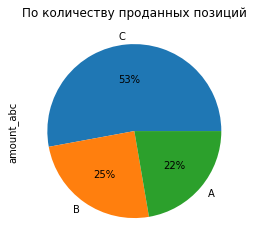

In [11]:
df['amount_abc'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('По количеству проданных позиций')

22% товаров принадлежат к группе А. 22% товаров обеспечивают 80% продаж.

Text(0.5, 1.0, 'По прибыли с позиции')

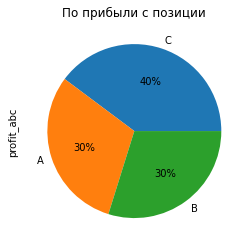

In [12]:
df['profit_abc'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('По прибыли с позиции')

30% товаров принадлежат к группе А. 30% товаров обеспечивают 80% прибыли с позиции.

Text(0.5, 1.0, 'По выручке')

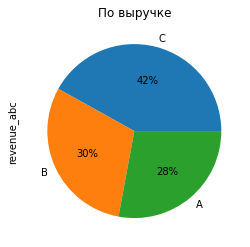

In [13]:
df['revenue_abc'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('По выручке')

28% товаров принадлежат к группе А. 28% товаров обеспечивают 80% выручки.